# **Rede neural profunda para classificação na base de dados Iris com otimização de hiperparâmetros usando PSO**

# Introdução

<p align='justify' style="font-size:160%;">Neste projeto será demostrado algumas análises exploratórias ao longo do conjunto de dados Iris a partir da execução de alguns casos de teste como uma solução ao problema de otimização dos hiperparâmetros peso e limiar das camadas de uma rede neural profunda. Como ferramentas foram utilizados o Jupyter Notebook que é uma aplicação de código aberto para escrita de código de forma dinâmica com execução iterativa, onde se fez uso da linguagem de programação Phyton para formulação das funções que descreveram os cenários de criação e execução de uma rede perceptron multicamada com os resultados de treinamento e execução de previsões de classificação em linguagem de interpretação HTML (HyperText Markup Language). A base de dados Iris é um dataset frequentemente usado em mineração de dados, classificação e em testes de redes neurais. O dataset contém dados sobre três espécies de flores Iris (Iris Setosa, Iris Virginica e Iris Versicolor) e para cada uma das espécies se têm dados de quatro de suas características (comprimento e largura das sépalas e comprimento e largura das pétalas), ao todo se têm 150 amostras sendo divididas por igual para as três espécies. Nos mostrando por meio deste estudo experimental, apoiado pelos testes estatísticos, que o PSO é uma técnica eficaz para automatizar a seleção de alguns hiperparâmetros de uma rede neural profunda.</p>

# Dataset

<p align='justify' style="font-size:160%;">Para este projeto o dataset foi carregado através da biblioteca Scikit-learn que é uma biblioteca de aprendizado de máquina de código aberto que oferece suporte ao aprendizado supervisionado e não supervisionado, além de fornecer ferramentas para ajuste de modelo, pré-processamento de dados, entre outras.</p>

In [2]:
#Importando dataset
from sklearn.datasets import load_iris

# Carregando dataset de iris
dataset = load_iris()

# Guardando dados de entrada e as saídas desejadas para cada amostra de treinamento
amostras = dataset.data
y_desejado = dataset.target

<p align='justify' style="font-size:160%;">Após importar a biblioteca com o conjunto de dados que será utilizado as instâncias com os dados foram carregados e gravados em uma variável e depois os valores de entrada (comprimento e largura das sépalas e das pétalas dados em centímetros) das amostras foram separados em uma matriz (150x4) e os valores de classificação (número da classe ao qual pertence aquela a amostra, 0 para Setosa, 1 para Versicolor e 2 Virginica) em outra matriz (150x1), a seguir temos a apresentação de duas amostras de cada espécie.</p>

In [3]:
import pandas as pd

#Guardando os respectivos registros do vetor de amostras em dataframe
df1 = pd.DataFrame(amostras[0:2], columns=[dataset.feature_names], index=['1', '2'])
df1['target'] = y_desejado[0:2]
df2 = pd.DataFrame(amostras[50:52], columns=[dataset.feature_names], index=['51', '52'])
df2['target'] = y_desejado[50:52]
df3 = pd.DataFrame(amostras[100:102], columns=[dataset.feature_names], index=['101', '102'])
df3['target'] = y_desejado[100:102]
df = pd.concat([df1, df2, df3])
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
51,7.0,3.2,4.7,1.4,1
52,6.4,3.2,4.5,1.5,1
101,6.3,3.3,6.0,2.5,2
102,5.8,2.7,5.1,1.9,2


<p align='justify' style="font-size:160%;">Considerando as classes de espécies podemos através de um diagrama do tipo caixa visualizar a estimativa aproximada da distribuição dos valores das amostras do dataset.
Com o boxplot podemos observar que, apesar das amostras da espécie Iris Setosa apresentarem uma baixa variabilidade em seus dados em realação às demais espécies são as que mais possuem dados que lavantam suspeitas sobre a real classificação das amostras (outlier), e que em casos como os da espécie Iris Virginica estas possuem uma maior variabilidade, trazendo uma certa imprevisibilidade para projetos de classsificação. Não menos importante, é facil notar, também, que as flores da espécie Virginica são as quais possuem um tamanho maior em relação as da Sentosa e Versicolor.<p>

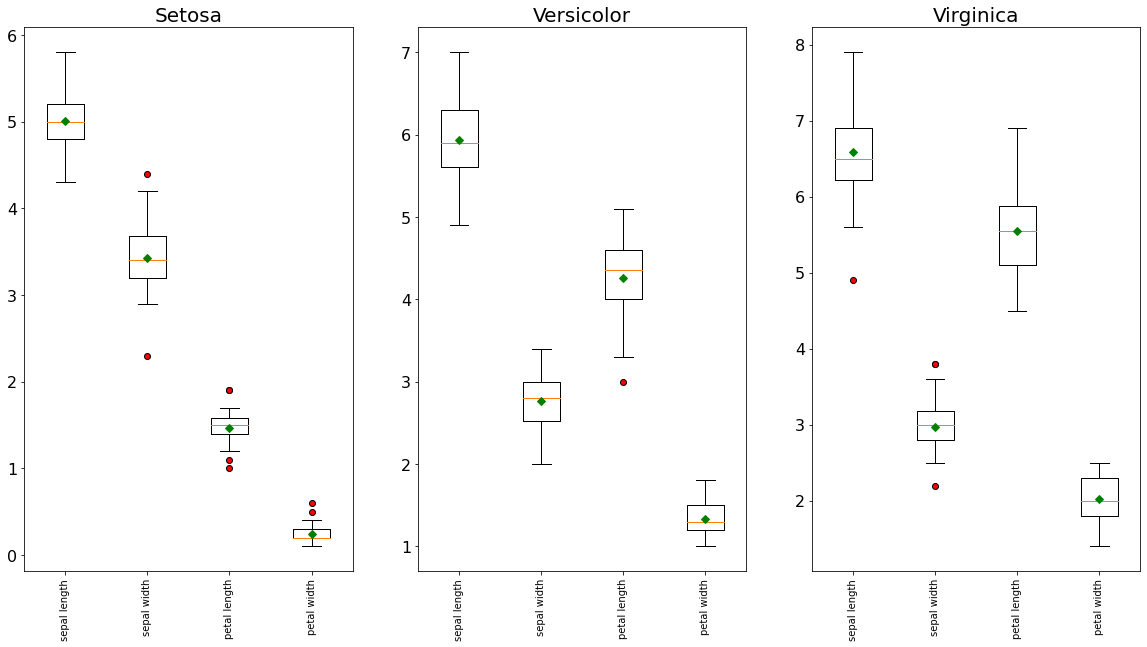

In [4]:
import matplotlib.pyplot as plt

# Transformando as amostras em dataframe
df1 = pd.DataFrame(amostras[0:50], columns=[dataset.feature_names])
df2 = pd.DataFrame(amostras[50:100], columns=[dataset.feature_names])
df3 = pd.DataFrame(amostras[100:150], columns=[dataset.feature_names])

# Visualizando estatística das features por espécie com boxplot
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict (markerfacecolor = 'green', marker = 'D', markeredgecolor = 'green')
fig, axs = plt.subplots(1, 3, figsize=(20,10))
for i, ax in enumerate(axs.flat):
    if i == 0:
        ax.boxplot(df1, labels=['sepal length','sepal width','petal length','petal width'], flierprops=red_circle, showmeans = True, meanprops=mean_shape)
        ax.xaxis.set_tick_params(rotation=90)
        ax.set_title('Setosa', fontsize=20)
        ax.tick_params(axis='y', labelsize=16)  
    elif i == 1:
        ax.boxplot(df2, labels=['sepal length','sepal width','petal length','petal width'], flierprops=red_circle, showmeans = True, meanprops=mean_shape)
        ax.xaxis.set_tick_params(rotation=90)
        ax.set_title('Versicolor', fontsize=20)
        ax.tick_params(axis='y', labelsize=16)
    else:
        ax.boxplot(df3, labels=['sepal length','sepal width','petal length','petal width'], flierprops=red_circle, showmeans = True, meanprops=mean_shape)
        ax.xaxis.set_tick_params(rotation=90)
        ax.set_title('Virginica', fontsize=20)
        ax.tick_params(axis='y', labelsize=16)

# Rede neural
<p align='justify' style="font-size:160%;">
O uso de redes neurais profundas para classificação de dados está cada vez mais crescendo no mundo da ciência de dados, e atualmente encontramos modelos para previsão que alcançam um nível de sucesso excelente nos treinamentos e testes. No entanto, esses modelos são dependentes do ajuste de alguns valores de parâmetros (hiperparâmetros) para controlar o processo de treinamento do modelo, dependendo algumas vezes de especialistas para determinar tais valores ao longo do processo que resularão em modelo que trará previsões mais acertivas.
Neste estudo uma rede percepetron de três camadas (uma camada de entrada, uma camada oculta e uma camada de saída) foi criada, onde na camada de entrada temos a possibilidade de se trabalhar com 4 features, pelo fato do dataset apresentar quatro características das espécies de Iris, além de uma camada oculta com 20 neurônios (escolha aleatória), com 3 saídas, para inidicar as 3 espécies de flores.</p>

In [9]:
# Definição da arquiteura da rede neural
n_entrada = 4                # número de entradas na camada de entrada
n_oculta = 20                # número de neurônios na camada oculta
n_saida = 3                  # número de classes na camada de saídas
n_amostras = len(amostras)   # número de amostras

<p align='justify' style="font-size:160%;">
Como passo de criação, primeiramente foi criado um método para propagação direta (feedforward) de cada uma das partículas do PSO na rede, que serão inicializadas com valores aleatórios pequenos uniformemente distribuídos e evoluídos com a utilização do módulo "pyswarms.single.global_best", que a partir de um conjunto de soluções candidatas (fitness) procura encontrar a melhor solução atualizando a velocidade e a posição de partículas com movimentações durante a execução da várias épocas influenciadas pela partícula de melhor desempenho em um espaço de busca. Seguidos criação do método de ativação dos neurônios das camadas oculta e de saída usando a função sigmoid para calcular os valores (nets) de cada neurônio, finalizando a saída com uma probalidade preditiva de classificação (erro) através da função softmax. Repetindo o processo após os ajustes das particulas pelo PSO que recebe a execução desses processos da rede neural como função objetivo.
</p>

In [5]:
import numpy as np

def ativacao(p):
    # Estrutura dos vetores de pesos e bias a partir da lista de parâmetros
    W1 = p[0:80].reshape((n_entrada,n_oculta))      # pesos oculta-entrada
    b1 = p[80:100].reshape((n_oculta,))             # bias oculta-entrada
    W2 = p[100:160].reshape((n_oculta,n_saida))     # pesos saída-oculta
    b2 = p[160:163].reshape((n_saida,))             # bias saída-oculta

    # Ativando camada oculta pela função de ativação sigmoid
    z1 = amostras.dot(W1) + b1      # nets da camada oculta
    a1 = np.tanh(z1)                # ativação da camada oculta
    y_obtido = a1.dot(W2) + b2      # nets da camada de saída
    return y_obtido                 # saídas da rede neural

# Propagação direta da rede neural
def propagacao(particula):
    y_obtido = ativacao(particula)

    # Probabilidade preditiva de classificação pela função softmax
    exp_scores = np.exp(y_obtido)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Calcula o erro da saída de rede
    corect_logprobs = -np.log(probs[range(n_amostras), y_desejado]) # erro por saída
    erro = np.sum(corect_logprobs) / n_amostras                     # erro médio total

    return erro

def funcao_obj(enxame):
    n_particulas = enxame.shape[0]
    enxame = [propagacao(enxame[i]) for i in range(n_particulas)]
    return np.array(enxame)

In [4]:
import pyswarms as ps

# Definindo fator de aceleração 1 e 2 e peso de inércia para o PSO
parametrosPSO = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
dimensoes = (n_entrada * n_oculta) + (n_oculta * n_saida) + n_oculta + n_saida
n_particulas = 100

# Iniciando PSO
otimizacao = ps.single.GlobalBestPSO(n_particles=n_particulas, dimensions=dimensoes, options=parametrosPSO)

# Realizando treinamento/otimização
custo, posicao = otimizacao.optimize(funcao_obj, iters=1000, verbose=False)

In [ ]:
# Calculando a acurácia
def avaliacao(posicao):
    y_obtido = ativacao(posicao)
    resultado = np.argmax(y_obtido, axis=1)
    return resultado

# Resultado do treinamento

In [5]:
print("Valor ótimo de minização: ", custo)
print("Pesos otimizados da camada oculta:\n", posicao[:80])
print("Bias otimizados da camada oculta:\n", posicao[80:100])
print("Pesos otimizados da camada de saída:\n", posicao[100:160])
print("Bias otimizados da camada de saída:\n", posicao[160:])

Valor ótimo de minização:  0.00023724544633023484
Pesos otimizados da camada oculta:
 [ 1.45907353  1.1921351   0.89154503  1.03765813 -0.82479544 -0.77148451
  1.42544754  1.56380511 -1.45457078  0.22338136  0.91026312 -1.75123616
 -0.59340242  1.73791052  4.257714    1.47377241  0.95535156 -0.31947122
  1.49960368 -1.22085904  0.46564033 -3.10475643 -0.48281301  2.35709015
 -0.37575626 -0.86994926  1.29075609 -0.91871195 -1.09453694  1.69849375
 -1.02874338 -1.43076525 -1.98436526 -3.91926216  0.31973664 -0.56898465
  0.53808463  0.70756668  0.38862301  0.49300825  0.07168587  0.42674066
  0.51635703 -3.1419513  -0.97211482 -1.36690246  0.91881042 -0.59847132
  0.25704509 -1.96302628  0.65843132 -0.18420562  2.42287038  0.5353109
 -1.22591361  2.84039216 -3.83692799  1.24790098 -1.93347273  0.71714397
 -0.28800575  1.41340364  1.04720025 -0.17879224 -3.84239269  1.06488206
  0.81767592  1.42301319  0.08406273 -1.15458943 -1.53956771 -6.15479647
  3.0050031   0.62389869 -4.20336026 -2

# Avaliação do treinamento e do teste

In [6]:
# Acurácia do treino
print("Acurácia de treino: ", (np.mean(avaliacao(posicao) == y_desejado) * 100))

Acurácia de treino:  100.0


# Execução e avaliação do teste

In [7]:
# Guardando dados de entrada e as saídas desejadas para cada amostra de teste
amostras = dataset.data[130:]
y_desejado = dataset.target[130:]

# Acurácia do teste
print("Acurácia de teste: ", (np.mean(avaliacao(posicao) == y_desejado) * 100))

Acurácia de teste:  95.0
